In [1]:
import pymc3 as mc
import numpy as pd 
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mu=4.0
sigma=2.0
model=mc.Model()
with model:
  mc.Normal('X', mu, tau=1/sigma**2)

In [3]:
model.vars

[X]

In [4]:
start=dict(X=2)
with model:
  step=mc.Metropolis()
  trace=mc.sample(10000,start=start, step=step)

Sequential sampling (2 chains in 1 job)
Metropolis: [X]
100%|██████████| 10500/10500 [00:01<00:00, 7709.86it/s]
The number of effective samples is smaller than 25% for some parameters.


In [5]:
X=trace.get_values("X")


In [6]:
x=np.linspace(-4,12,1000)
y=stats.norm(mu,sigma).pdf(x)

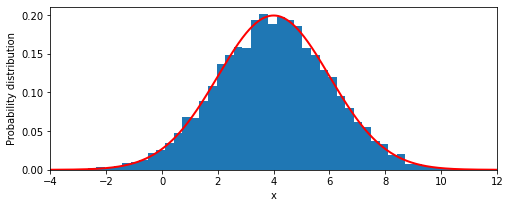

In [7]:
fig, ax= plt.subplots(figsize=(8,3))
ax.plot(x,y,'r',lw=2)
ax.hist(X,bins=50,density=True)
ax.set_xlim(-4,12)
ax.set_xlabel("x")
ax.set_ylabel("Probability distribution")
plt.show()